In [1]:
import sys
import os
#sys.path.insert(0, '/home/mahlet/10ac/Sales_prediction/data/')
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import calendar

sns.set(style='darkgrid')

In [2]:
def read_csv (filename):

        try:
            data= pd.read_csv(filename)
        
        except FileNotFoundError as e:
            print ("unable to open")
        
        return data

In [3]:
train_data=read_csv("data/train.csv")
test_data=read_csv("data/test.csv")
store_data=read_csv("data/store.csv")

/tmp/ipykernel_35010/481514169.py:1: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  train_data=read_csv("data/train.csv")


In [4]:
train_data.sort_values(by='Date', ascending=True, inplace=True)

In [5]:
#Note that all schools are closed on public holidays and weekends. 
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1


In [6]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [25]:
def identify_unique_value (df):
    for col in df:
        unique=df[col].nunique()
        
        print(col,"......",unique)
        #print(df[col].nunique())
        

In [16]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [26]:
identify_unique_value(train_data)

Store ...... 1115
DayOfWeek ...... 7
Date ...... 942
Sales ...... 21734
Customers ...... 4086
Open ...... 2
Promo ...... 2
StateHoliday ...... 5
SchoolHoliday ...... 2


In [27]:
identify_unique_value(test_data)

Id ...... 41088
Store ...... 856
DayOfWeek ...... 7
Date ...... 48
Open ...... 2
Promo ...... 2
StateHoliday ...... 2
SchoolHoliday ...... 2


In [28]:
identify_unique_value(store_data)

Store ...... 1115
StoreType ...... 4
Assortment ...... 3
CompetitionDistance ...... 654
CompetitionOpenSinceMonth ...... 12
CompetitionOpenSinceYear ...... 23
Promo2 ...... 2
Promo2SinceWeek ...... 24
Promo2SinceYear ...... 7
PromoInterval ...... 3


In [30]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [31]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [32]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
def change_date(df1,df2):
    for df in (df1, df2):
        df['Date'] = df['Date'].astype('datetime64[ns]')
        df['Month'] = df.Date.dt.month
        df['Day'] = df.Date.dt.day
        df['Year'] = df.Date.dt.year.astype(str)+ '-01-01'
        df['Week']= (((df['Date'] - df['Year'].astype('datetime64[ns]')).dt.days)/7).astype('int16') +1
        df['Week']=  df.Week.where(df['Week']!=53, 52)
        df['Year'] = df.Date.dt.year
    return df1,df2
        

In [7]:
train_data,test_data=change_date(train_data,test_data)

In [37]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Day,Year,Week
1017208,1115,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1
1016473,379,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1
1016472,378,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1
1016471,377,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1
1016470,376,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1


In [8]:
#This function will be used to drop redundant or unwanted columns generated via join operations.
def drop_cols(gdf):
    for c in gdf.columns:
        if c.endswith('_y'):
            if c in gdf.columns: gdf.drop(c, inplace=True, axis=1)
    return gdf

In [9]:
#We will use the function below to perform left outer join operation. 
#The suffixes argument describes the naming convention for duplicate fields
def merge(df, right, left_on, right_on=None, suffix=None):
    df = df.merge(right, how='left', left_on=left_on, right_on=right_on or left_on, suffixes=('', suffix or '_y'))
    return df

In [10]:

train_df = merge(train_data, store_data, 'Store')
test_df = merge(test_data, store_data, 'Store')

In [11]:
train_df = drop_cols(train_df)
test_df = drop_cols(test_df)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Month                      1017209 non-null  int64         
 10  Day                        1017209 non-null  int64         
 11  Year                       1017209 no

In [ ]:


Customers,StoreType,CompetitionDistance,store,promo,promo2sinceweek, competitionOpenscinceyear,assortment, since month date week

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   Month                      41088 non-null  int64         
 9   Day                        41088 non-null  int64         
 10  Year                       41088 non-null  int64         
 11  Week                       41088 non-null  int16         
 12  Stor

In [14]:
#Next we’ll fill in missing values to avoid complications with NA’s.
# Here, we are picking arbitrary signal values and filling the missing values with them.
def handdle_missing_values(df1,df2):
    for df in [df1, df2]:
        df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype('int32')
        df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype('int32')
        df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype('int32')
        df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype('int32')
        df['PromoInterval'] = df['PromoInterval'].fillna(df['PromoInterval'].mode()[0])
        df['PromoInterval'] = df['PromoInterval'].fillna(df['PromoInterval'].mode()[0])
        df["CompetitionDistance"].fillna(lambda x: random.choice(df[df[CompetitionDistance] != np.nan]["CompetitionDistance"]), inplace =True)
        
        return df1,df2



In [15]:
train_df,test_df= handdle_missing_values(train_df,test_df)

In [16]:
train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Month                        0
Day                          0
Year                         0
Week                         0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [62]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,...,Week,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1115,2,2013-01-01,0,0,0,0,a,1,1,...,1,d,c,5350.0,1,1900,1,22,2012,"Mar,Jun,Sept,Dec"
1,379,2,2013-01-01,0,0,0,0,a,1,1,...,1,d,a,6630.0,1,1900,0,1,1900,"Jan,Apr,Jul,Oct"
2,378,2,2013-01-01,0,0,0,0,a,1,1,...,1,a,c,2140.0,8,2012,0,1,1900,"Jan,Apr,Jul,Oct"
3,377,2,2013-01-01,0,0,0,0,a,1,1,...,1,a,c,100.0,6,2010,1,18,2010,"Feb,May,Aug,Nov"
4,376,2,2013-01-01,0,0,0,0,a,1,1,...,1,a,a,160.0,8,2012,0,1,1900,"Jan,Apr,Jul,Oct"


###  Exploration 

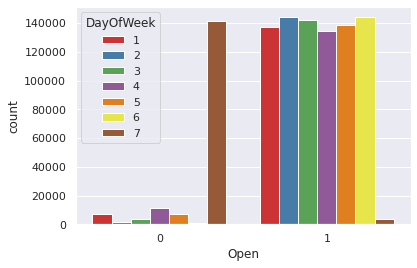

In [26]:
#To know when are the stores open
ax = sns.countplot(x='Open', hue='DayOfWeek', data=train_df, palette='Set1')

##### The above histogram shows most of the stores are open on week days except sunday

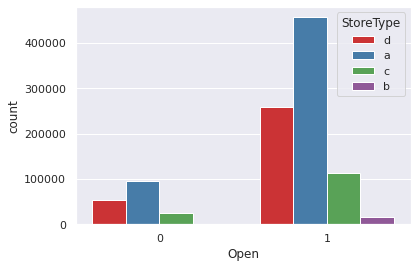

In [61]:
#To know when are the stores open and store type
ax = sns.countplot(x='Open', hue='StoreType', data=train_df, palette='Set1')


In [27]:
# median sales
median_sales = train_df.groupby('Month')['Sales'].median()
pct_median_change = train_df.groupby('Month')['Sales'].median().pct_change()
# median customers
median_cust = train_df.groupby('Month')['Customers'].median()
pct_median_custchange = train_df.groupby('Month')['Customers'].median().pct_change()

<AxesSubplot:>

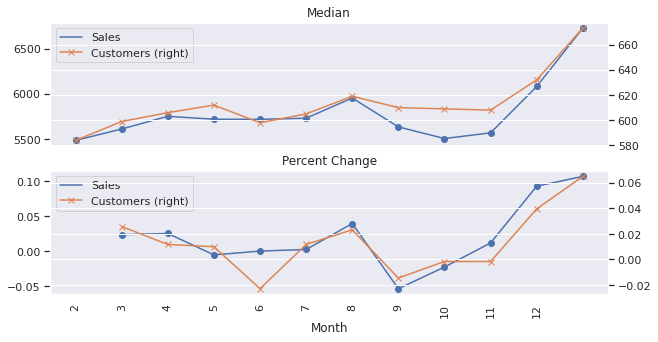

In [28]:

fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = median_sales.plot(legend=True, ax=axis1, marker='o',title="Median")
ax1.set_xticks(range(len(median_sales)))
ax1.set_xticklabels(median_sales.index.tolist(), rotation=90)


ax2 = pct_median_change.plot(legend=True, ax=axis2, marker='o',rot=90, title="Percent Change")

# overlay customer data
median_cust.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
pct_median_custchange.plot(legend=True, ax=axis2, marker='x', rot=90, secondary_y=True)

/tmp/ipykernel_32529/167100973.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day = train_df[(train_data['Open']!=0)]


<AxesSubplot:>

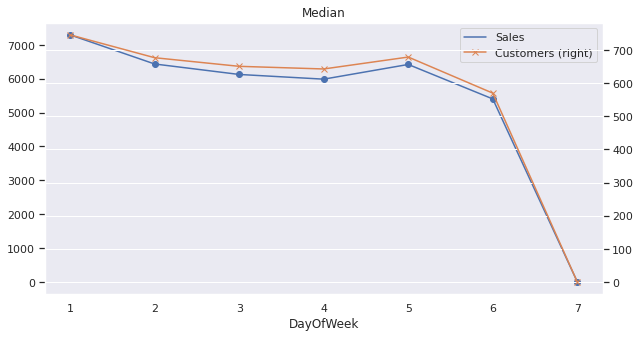

In [29]:
# group sales/customer data by weekday
day = train_df[(train_data['Open']!=0)]
sales_day = day.groupby('DayOfWeek')['Sales'].median()
cust_day = day.groupby('DayOfWeek')['Customers'].median()
#
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = sales_day.plot(legend=True, ax=axis1, marker='o',title="Median")
ax1.set_xticks(sales_day.index)
tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

#### From the bove plot we can see that the constemrs and sales interation is dropping in the saturday. Most of the customer visit store on monday des not buy.

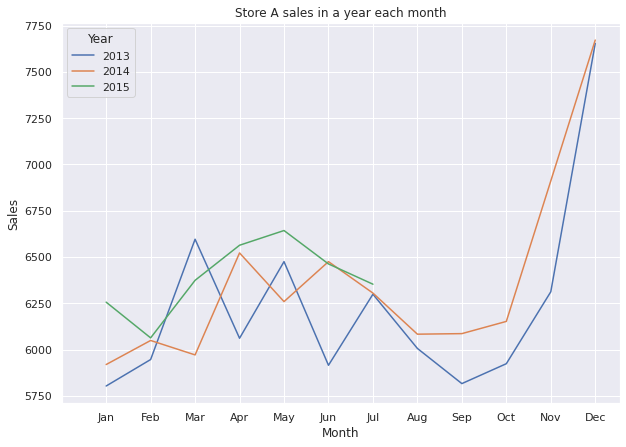

In [78]:

# select all stores that were open
store_a= train_df[train_df['StoreType']=="a"]
subs = store_a[store_a['Open']!=0 ]

# groupby Year and Month
selected_sales = subs.groupby(['Year', 'Month'])['Sales'].median()
selected_cust = subs.groupby(['Year', 'Month'])['Customers'].median()

# plot
fig, (axis1) = plt.subplots(1,1, figsize=(10,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Store A sales in a year each month")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

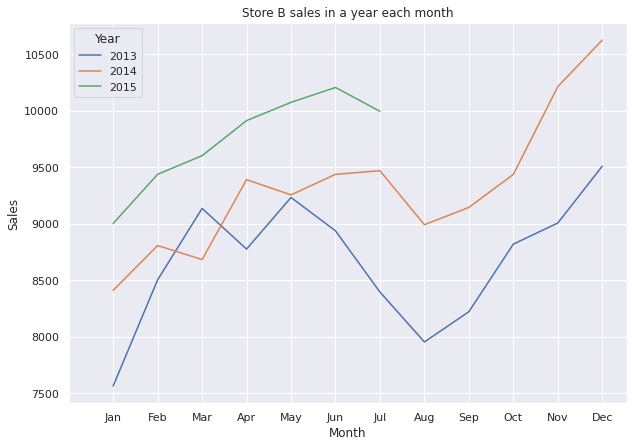

In [80]:

# select all stores that were open
store_a= train_df[train_df['StoreType']=="b"]
subs = store_a[store_a['Open']!=0 ]

# groupby Year and Month
selected_sales = subs.groupby(['Year', 'Month'])['Sales'].median()
selected_cust = subs.groupby(['Year', 'Month'])['Customers'].median()

# plot
fig, (axis1) = plt.subplots(1,1, figsize=(10,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Store B sales in a year each month")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

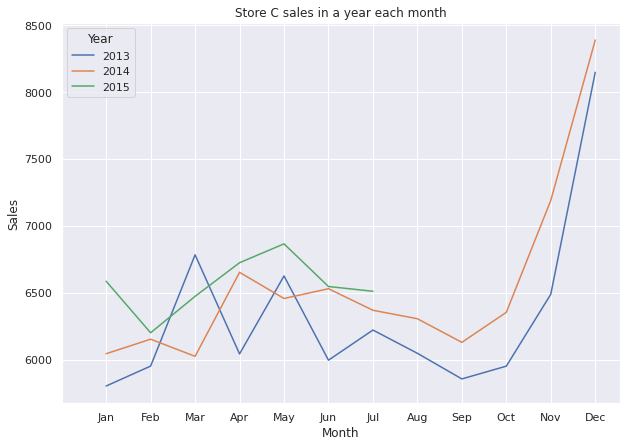

In [83]:
# select all stores that were open
store_a= train_df[train_df['StoreType']=="c"]
subs = store_a[store_a['Open']!=0 ]

# groupby Year and Month
selected_sales = subs.groupby(['Year', 'Month'])['Sales'].median()
selected_cust = subs.groupby(['Year', 'Month'])['Customers'].median()

# plot
fig, (axis1) = plt.subplots(1,1, figsize=(10,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Store C sales in a year each month")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

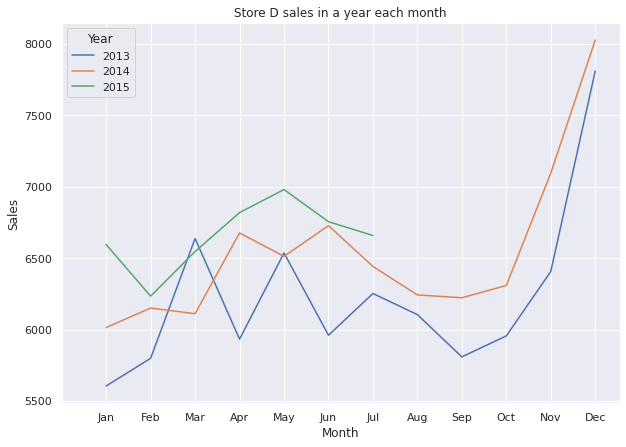

In [84]:
# select all stores that were open
store_a= train_df[train_df['StoreType']=="d"]
subs = store_a[store_a['Open']!=0 ]

# groupby Year and Month
selected_sales = subs.groupby(['Year', 'Month'])['Sales'].median()
selected_cust = subs.groupby(['Year', 'Month'])['Customers'].median()

# plot
fig, (axis1) = plt.subplots(1,1, figsize=(10,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Store D sales in a year each month")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

/home/mahlet/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


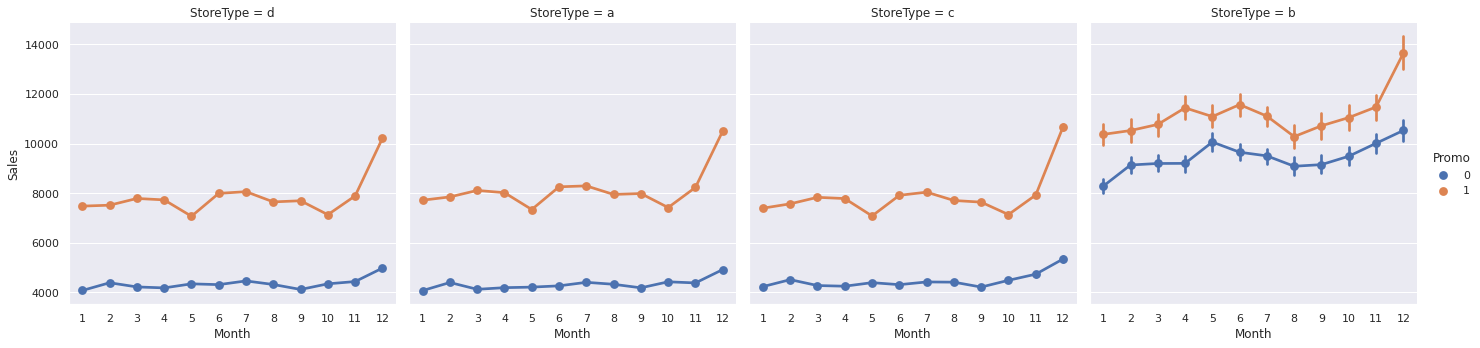

In [86]:
sns.factorplot(data=train_df, x="Month" ,y="Sales",
              col="StoreType",
              hue="Promo")

/home/mahlet/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


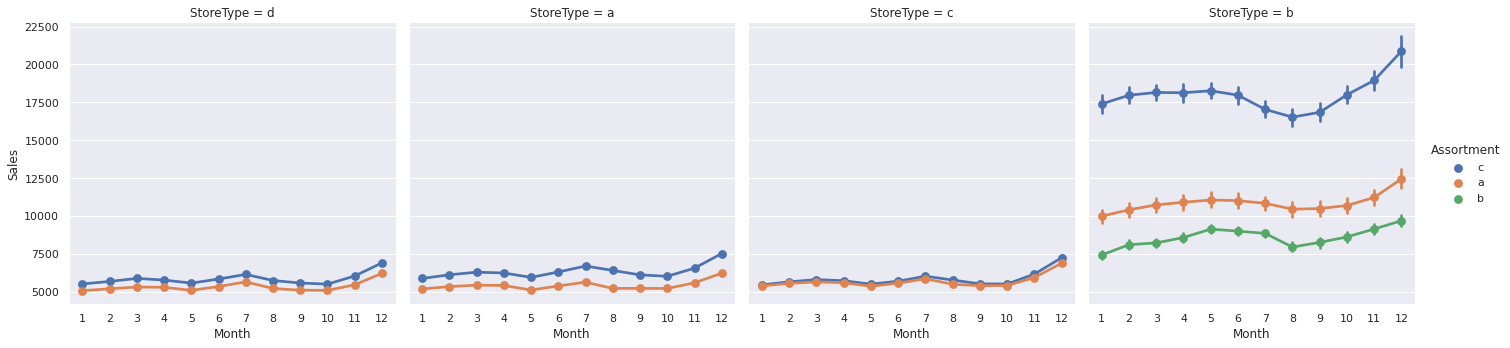

In [87]:
sns.factorplot(data=train_df, x="Month" ,y="Sales",
              col="StoreType",
              hue="Assortment")

In [ ]:
sns.relplot(x="DayOfWeek", y="Sales", hue="StoreType", 
            dashes=False, markers=True, kind="line", data=train_df)

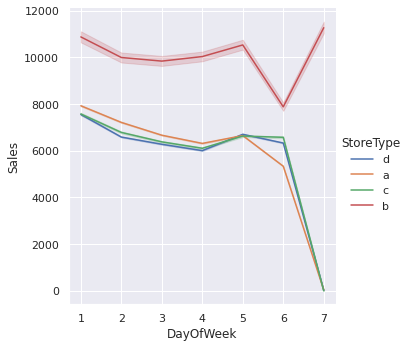

In [111]:
sns.relplot(x="DayOfWeek", y="Sales", hue="StoreType", 
            dashes=False, markers=True, kind="line", data=train_df)

In [19]:
#Filtering of values having 0 in state holiday
test_df = test_df[test_df.StateHoliday != 0]
#Filtering of values having 0 in state holiday
train_df = train_df[train_df.StateHoliday != 0]

In [20]:
label=train_df["Sales"]
df_train=train_df.drop(["Sales"],axis=1)
df_train['CompetitionDistance']=pd.to_numeric(df_train['CompetitionDistance'],errors='coerce').fillna(0, downcast='infer')

#df["a"] = df["a"].astype(str).astype(float)

df_train.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Day,...,Week,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1115,2,2013-01-01,0,0,0,a,1,1,1,...,1,d,c,5350,1,1900,1,22,2012,"Mar,Jun,Sept,Dec"
1,379,2,2013-01-01,0,0,0,a,1,1,1,...,1,d,a,6630,1,1900,0,1,1900,"Jan,Apr,Jul,Oct"
2,378,2,2013-01-01,0,0,0,a,1,1,1,...,1,a,c,2140,8,2012,0,1,1900,"Jan,Apr,Jul,Oct"
3,377,2,2013-01-01,0,0,0,a,1,1,1,...,1,a,c,100,6,2010,1,18,2010,"Feb,May,Aug,Nov"
4,376,2,2013-01-01,0,0,0,a,1,1,1,...,1,a,a,160,8,2012,0,1,1900,"Jan,Apr,Jul,Oct"


Text(0.5, 1.0, 'Correlation between variables')

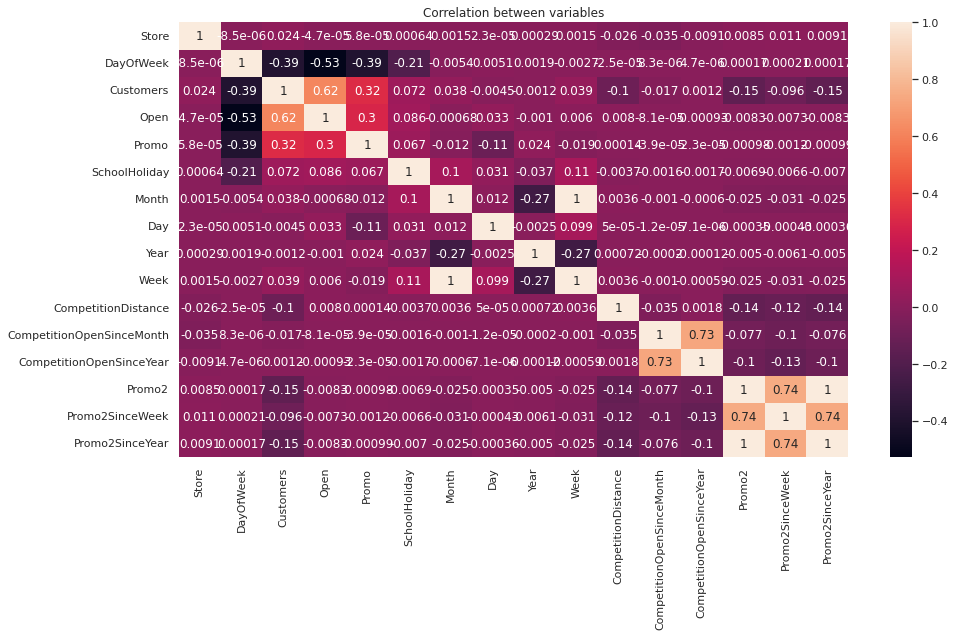

In [50]:
#variables corelation 

sales_correlation= df_train.corr()
plt.figure(figsize=(15,8))
ax = plt.axes()

sns.heatmap(sales_correlation, annot=True)
ax.set_title("Correlation between variables")

In [23]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
df_train['StoreType']=encoder.fit_transform(df_train['StoreType'])
df_train['Assortment']=encoder.fit_transform(df_train['Assortment'])
df_train['PromoInterval']=encoder.fit_transform(df_train['PromoInterval'])
df_train['StateHoliday']=encoder.fit_transform(df_train['StateHoliday'])

df_train.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Day,...,Week,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1115,2,2013-01-01,0,0,0,1,1,1,1,...,1,3,2,5350,1,1900,1,22,2012,2
1,379,2,2013-01-01,0,0,0,1,1,1,1,...,1,3,0,6630,1,1900,0,1,1900,1
2,378,2,2013-01-01,0,0,0,1,1,1,1,...,1,0,2,2140,8,2012,0,1,1900,1
3,377,2,2013-01-01,0,0,0,1,1,1,1,...,1,0,2,100,6,2010,1,18,2010,0
4,376,2,2013-01-01,0,0,0,1,1,1,1,...,1,0,0,160,8,2012,0,1,1900,1


Text(0.5, 1.0, 'Correlation between variables')

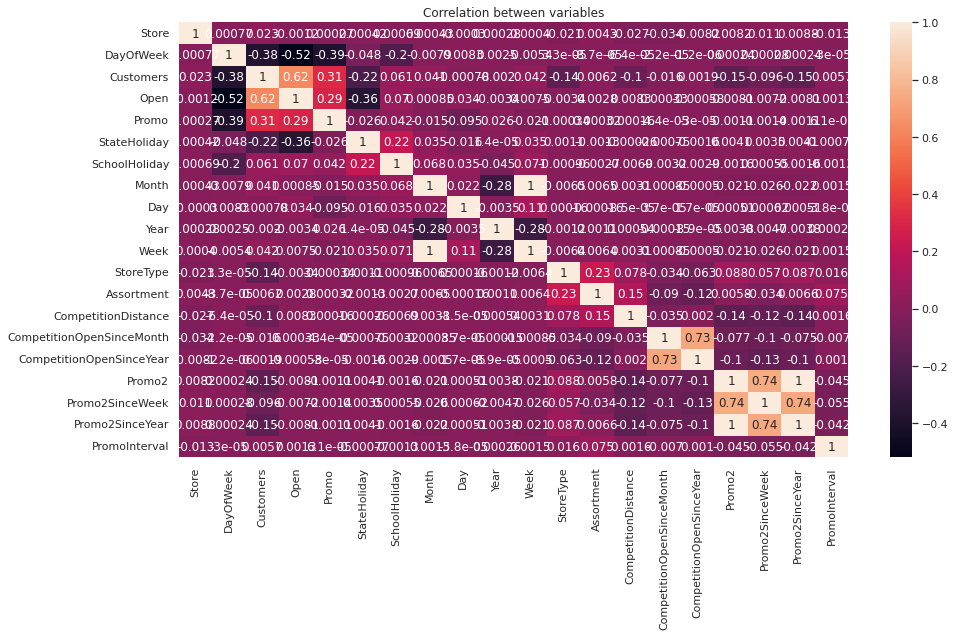

In [24]:
#variables corelation 

all_correlation= df_train.corr()
plt.figure(figsize=(15,8))
ax = plt.axes()

sns.heatmap(all_correlation, annot=True)
ax.set_title("Correlation between variables")
    

In [58]:
columns = np.full((sales_correlation.shape[0],), True, dtype=bool)
for i in range(sales_correlation.shape[0]):
    for j in range(i+1, sales_correlation.shape[0]):
        if sales_correlation.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
                
selected_columns = df_train.columns[columns]
data = train_df[selected_columns]

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False])

In [25]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [26]:
#dataset with correlation less than 0.75
df= trimm_correlated(df_train,0.75)

In [27]:
df.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Day,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval
0,1115,2,0,0,0,1,1,1,1,2013,3,2,5350,1,1900,1,22,2
1,379,2,0,0,0,1,1,1,1,2013,3,0,6630,1,1900,0,1,1
2,378,2,0,0,0,1,1,1,1,2013,0,2,2140,8,2012,0,1,1
3,377,2,0,0,0,1,1,1,1,2013,0,2,100,6,2010,1,18,0
4,376,2,0,0,0,1,1,1,1,2013,0,0,160,8,2012,0,1,1


In [28]:
df['Sales']=label

/tmp/ipykernel_35010/1197302645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales']=label


In [29]:
df.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Day,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval,Sales
0,1115,2,0,0,0,1,1,1,1,2013,3,2,5350,1,1900,1,22,2,0
1,379,2,0,0,0,1,1,1,1,2013,3,0,6630,1,1900,0,1,1,0
2,378,2,0,0,0,1,1,1,1,2013,0,2,2140,8,2012,0,1,1,0
3,377,2,0,0,0,1,1,1,1,2013,0,2,100,6,2010,1,18,0,0
4,376,2,0,0,0,1,1,1,1,2013,0,0,160,8,2012,0,1,1,0


In [30]:
df.to_csv("data_correlation.csv")

In [31]:
Y=df['Sales']
X=df.drop(["Sales"],axis=1)


In [33]:
from sklearn.feature_selection import mutual_info_classif

importance=mutual_info_classif(X,Y)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/mahlet/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_35010/3548989745.py", line 3, in <module>
    importance=mutual_info_classif(X,Y)
  File "/home/mahlet/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/mahlet/.local/lib/python3.8/site-packages/sklearn/feature_selection/_mutual_info.py", line 448, in mutual_info_classif
    return _estimate_mi(X, y, discrete_features, True, n_neighbors,
  File "/home/mahlet/.local/lib/python3.8/site-packages/sklearn/feature_selection/_mutual_info.py", line 285, in _estimate_mi
    mi = [_compute_mi(x, y, discrete_feature, discrete_target, n_neighbors) for
  File "/home/mahlet/.local/lib/python3.8/site-packages/sklearn/feature_selection/_mutual_info.py", line 285, in <listcomp>
    mi = [_compute_mi(x, 

TypeError: object of type 'NoneType' has no len()

In [ ]:
feature_importance=pd.Series(importance, dataframe.columns[0:len(dataframe.columns)-1])
feature_importance.plot(kind='barh', color='teal')
plt.show

In [34]:
RF_train=df[['Customers','StoreType','CompetitionDistance','Store','Promo','Promo2SinceWeek','CompetitionOpenSinceYear','Assortment','CompetitionOpenSinceMonth','DayOfWeek','Sales']]

In [35]:
RF_train.head()

,Customers,StoreType,CompetitionDistance,Store,Promo,Promo2SinceWeek,CompetitionOpenSinceYear,Assortment,CompetitionOpenSinceMonth,DayOfWeek,Sales
0,0,3,5350,1115,0,22,1900,2,1,2,0
1,0,3,6630,379,0,1,1900,0,1,2,0
2,0,0,2140,378,0,1,2012,2,8,2,0
3,0,0,100,377,0,18,2010,2,6,2,0
4,0,0,160,376,0,1,2012,0,8,2,0


In [36]:
RF_train.to_csv("RF_train.csv")

In [37]:
RF_test=df[['Customers','StoreType','CompetitionDistance','Store','Promo','Promo2SinceWeek','CompetitionOpenSinceYear','Assortment','CompetitionOpenSinceMonth','DayOfWeek']]

In [38]:
RF_test.to_csv("RF_test.csv")